In [18]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from jupyterthemes import jtplot
jtplot.style(grid=False)

import acquire



Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.
- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X = iris[['petal_width','sepal_width']]

In [6]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
X_scaled.head()

,petal_width,sepal_width
0,-1.315444,1.019004
1,-1.315444,-0.131979
2,-1.315444,0.328414
3,-1.315444,0.098217
4,-1.315444,1.249201


In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2], dtype=int32)

In [9]:
iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [10]:
iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
133,6.3,2.8,5.1,1.5,virginica,0
20,5.4,3.4,1.7,0.2,setosa,1
115,6.4,3.2,5.3,2.3,virginica,2
113,5.7,2.5,5.0,2.0,virginica,0
49,5.0,3.3,1.4,0.2,setosa,1
46,5.1,3.8,1.6,0.2,setosa,1
54,6.5,2.8,4.6,1.5,versicolor,0
101,5.8,2.7,5.1,1.9,virginica,0
83,6.0,2.7,5.1,1.6,versicolor,0
43,5.0,3.5,1.6,0.6,setosa,1


In [11]:
kmeans.cluster_centers_

array([[ 0.1941248 , -1.03317533],
       [-1.25634413,  0.90625492],
       [ 0.9710555 ,  0.07690277]])

In [12]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width
0,0.194125,-1.033175
1,-1.256344,0.906255
2,0.971055,0.076903


In [13]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['petal_width', 'sepal_width'].mean()
centroids

,petal_width,sepal_width
cluster,,
0,1.346809,2.608511
1,0.244898,3.451020
2,1.937037,3.090741


In [14]:
# Another way
# use inverse scaler to get cluster centers in original unscaled units
scaler.inverse_transform(kmeans.cluster_centers_)

array([[1.34680851, 2.60851064],
       [0.24489796, 3.45102041],
       [1.93703704, 3.09074074]])

In [15]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2], dtype=int32)

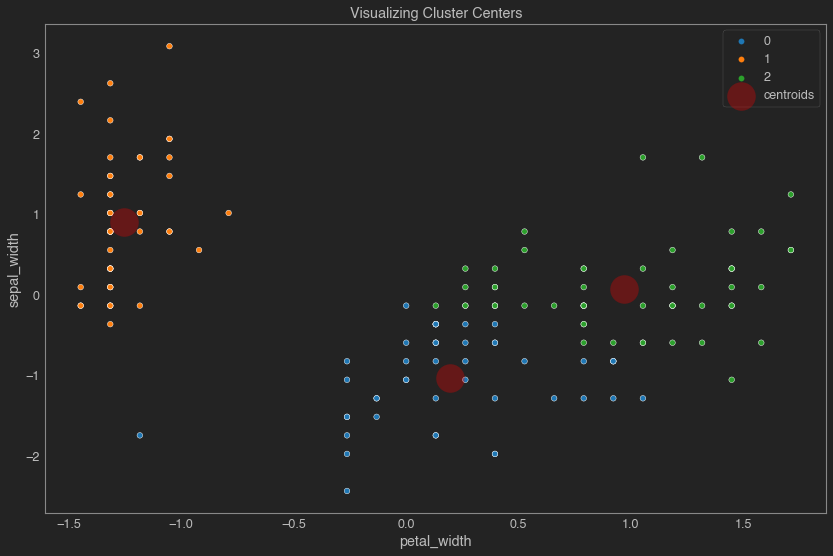

In [22]:

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = X_scaled, hue = 'cluster', palette='tab10')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='red', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [23]:
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,cluster_1
1,4.9,3.0,1.4,0.2,setosa,cluster_1
2,4.7,3.2,1.3,0.2,setosa,cluster_1
3,4.6,3.1,1.5,0.2,setosa,cluster_1
4,5.0,3.6,1.4,0.2,setosa,cluster_1


In [24]:
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)

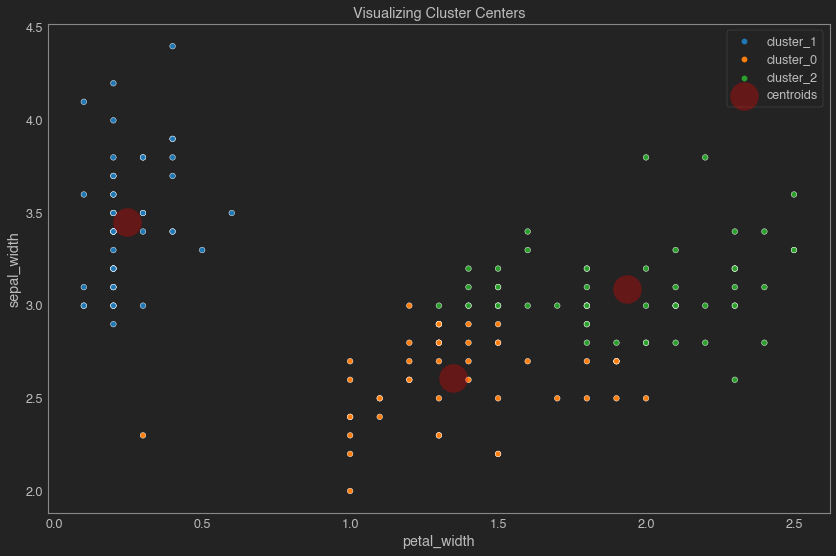

In [25]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = iris, hue = 'cluster', palette='tab10')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='red', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [26]:
kmeans.inertia_

79.23480116760695

In [31]:
X_scaled.iloc[:,:2].head()

,petal_width,sepal_width
0,-1.315444,1.019004
1,-1.315444,-0.131979
2,-1.315444,0.328414
3,-1.315444,0.098217
4,-1.315444,1.249201


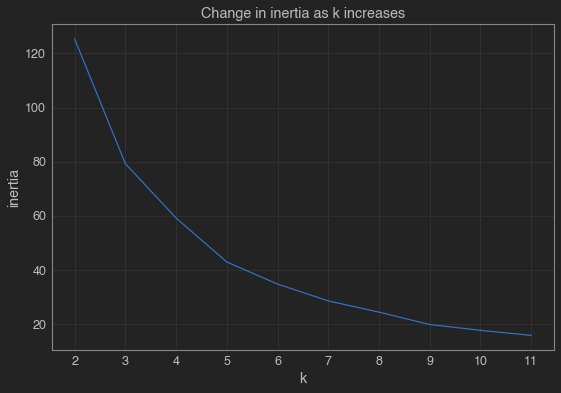

In [38]:
with plt.style.context('ggplot'):
    jtplot.style()
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled.iloc[:,:2]).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

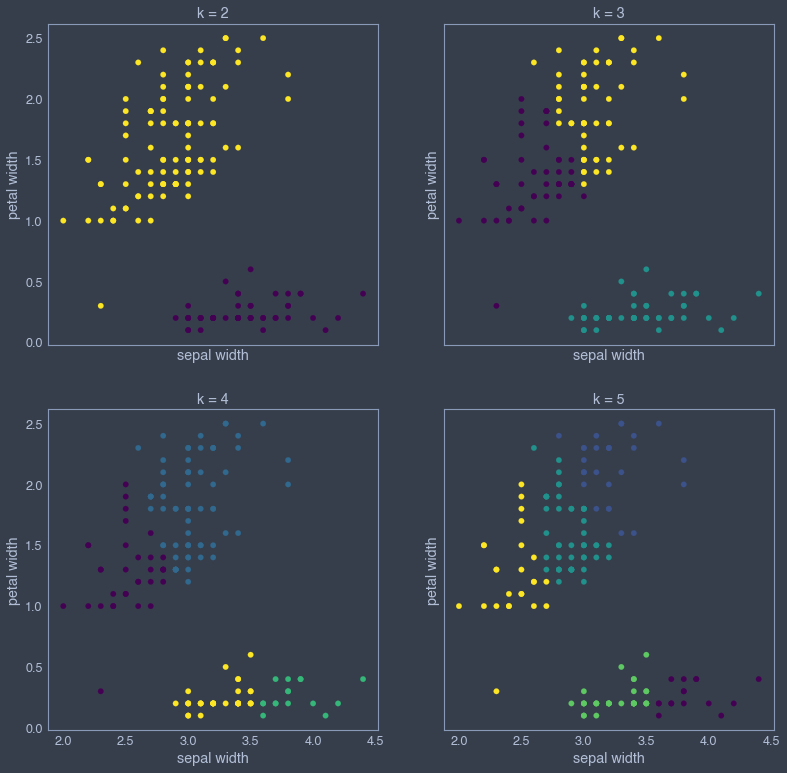

In [44]:
# What value of k is appropriate?
jtplot.style(theme='onedork', grid=False)
X_scaled = X_scaled.iloc[:,:2]
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

In [54]:

# Useful functions I used:


def create_cluster(train, X, k):
    # takes in train, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 539)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    train['cluster'] = kmeans.predict(X_scaled)
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return train, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,train,kmeans, X_scaled, scaler):
    # takes in x and y (variable names as strings, along with returned objects from previous
    # fuction create_cluster and creates a plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = train, hue = 'cluster', palette='tab10')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='red')

In [48]:
X = iris[['petal_width','sepal_width','petal_length']]

In [49]:
iris, X_scaled, scaler, kmeans, centroids = create_cluster(iris, X, 3)

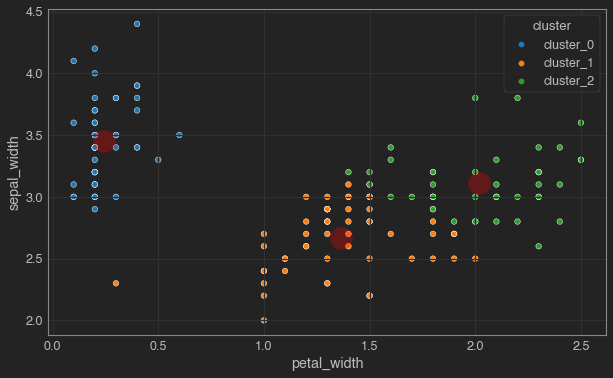

In [55]:
jtplot.style()
create_scatter_plot('petal_width','sepal_width',iris,kmeans, X_scaled, scaler)

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.